In [48]:
import csv
import ast
import numpy as np
import matplotlib.pyplot as plt

Experiment 1:

M1
   => M3 => M4 => M5 => M6 => M7 
M2

All machines have 100s as operation time.

In [61]:
csv_file_path = 'results/results.csv'
data = {}
with open(csv_file_path, newline='') as csvfile:
    csv_reader = csv.DictReader(csvfile)

    for row in csv_reader:
        row['Mean Idle Times'] = ast.literal_eval(row['Mean Idle Times'])
        row['Sum Idle Times'] = ast.literal_eval(row['Sum Idle Times'])
        row['Downtime'] = ast.literal_eval(row['Downtime'])
        row['Mean CT'] = ast.literal_eval(row['Mean CT'])

        data[row['Experiment']] = row

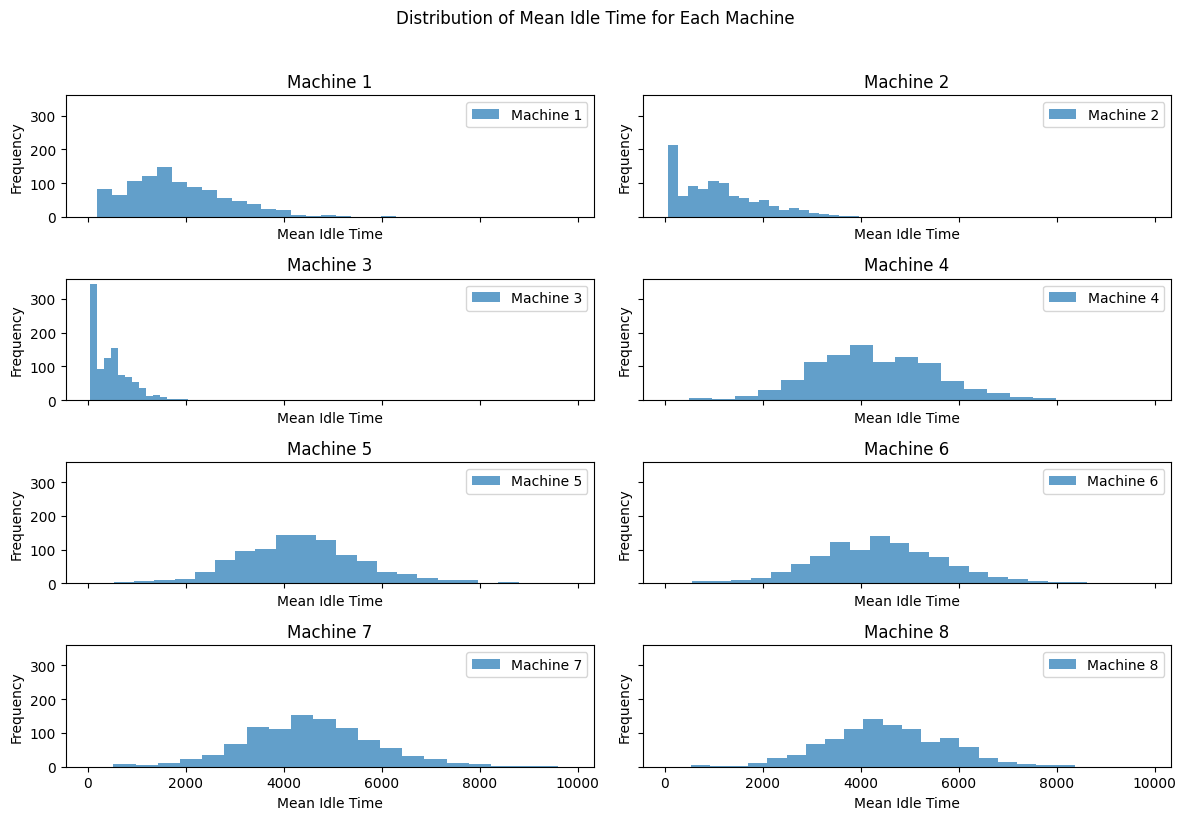

In [62]:
import matplotlib.pyplot as plt

machine_mean_idle_times = {}

for experiment, row in data.items():
    for machine_num, idle_time in enumerate(row['Mean Idle Times'], start=1):
        if machine_num not in machine_mean_idle_times:
            machine_mean_idle_times[machine_num] = []
        machine_mean_idle_times[machine_num].append(idle_time)

num_machines = len(machine_mean_idle_times)
num_rows = (num_machines // 2) + (num_machines % 2)  

fig, axes = plt.subplots(num_rows, 2, figsize=(12, 8), sharex=True, sharey=True)
fig.suptitle('Distribution of Mean Idle Time for Each Machine', y=1.02)

axes = axes.flatten()

for machine_num, ax in zip(sorted(machine_mean_idle_times.keys()), axes):
    mean_idle_times = machine_mean_idle_times[machine_num]
    ax.hist(mean_idle_times, bins=20, label=f'Machine {machine_num}', alpha=0.7)
    ax.set_title(f'Machine {machine_num}')
    ax.set_xlabel('Mean Idle Time')
    ax.set_ylabel('Frequency')
    ax.legend()

if num_machines % 2 == 1:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()




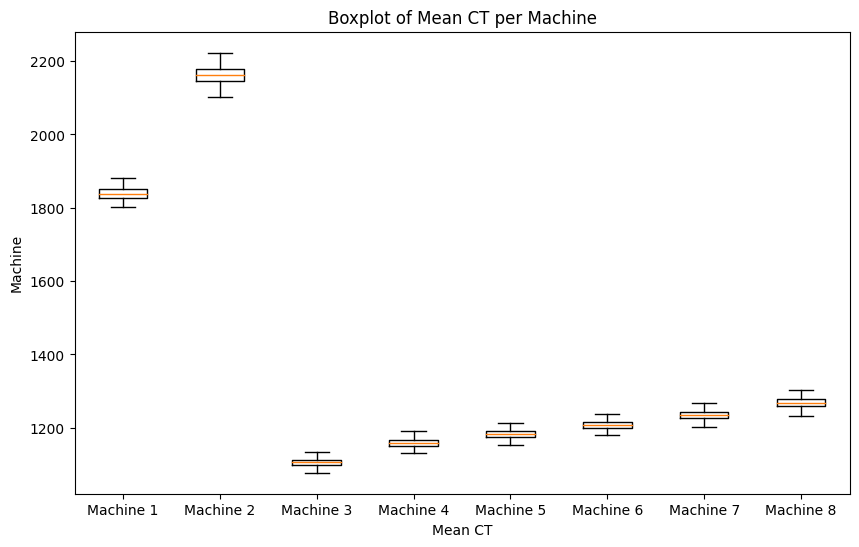

In [63]:
import matplotlib.pyplot as plt
import numpy as np

mean_ct_values_per_machine = {}
for experiment, row in data.items():
    for machine_num, _ in enumerate(row['Mean Idle Times'], start=1): 
        machine_mean_ct_values = []
        
        for row in data.values():
            machine_mean_ct_values.append(row['Mean CT'][machine_num - 1])
        
        mean_ct_values_per_machine[f'Machine {machine_num}'] = machine_mean_ct_values
        
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(mean_ct_values_per_machine.values(), vert=True, labels=mean_ct_values_per_machine.keys(), sym='.', showfliers=False)
ax.set_title('Boxplot of Mean CT per Machine')
ax.set_xlabel('Mean CT')
ax.set_ylabel('Machine')
plt.show()

#### Line Cycle Time Analysis

In [59]:
import pandas as pd

mean_ct_values_per_machine = {}

for experiment, row in data.items():
    for machine_num, _ in enumerate(row['Mean Idle Times'], start=1): 
        machine_mean_ct_values = []
        
        for row in data.values():
            machine_mean_ct_values.append(row['Mean CT'][machine_num - 1])
        
        mean_ct_values_per_machine[f'Machine {machine_num}'] = machine_mean_ct_values

descriptive_df = pd.DataFrame()

for machine, values in mean_ct_values_per_machine.items():
    descriptive_df[machine] = values

descriptive_stats = descriptive_df.describe().transpose()

print("Descriptive Analysis of Mean CT per Machine:")
print(descriptive_stats)


Descriptive Analysis of Mean CT per Machine:
            count          mean           std          min          25%  \
Machine 1  1000.0   1279.101696   1152.877263  1083.159214  1104.859335   
Machine 2  1000.0   1477.548435   1328.217427  1245.555022  1274.963109   
Machine 3  1000.0  11099.877205  10277.095238  8470.588235  9391.304348   
Machine 4  1000.0   1379.252778   1247.118934  1162.853297  1191.176471   
Machine 5  1000.0   1452.513803   1311.659603  1226.691907  1254.598258   
Machine 6  1000.0   1484.234872   1332.004115  1251.569290  1282.533399   
Machine 7  1000.0   1519.500873   1367.053877  1283.803863  1311.740891   
Machine 8  1000.0   1564.866595   1415.191384  1323.124043  1350.000000   

                   50%           75%            max  
Machine 1  1112.446352   1120.622568   20736.000000  
Machine 2  1284.440040   1294.705295   23351.351351  
Machine 3  9671.641791  10007.722008  199384.615385  
Machine 4  1199.444702   1207.265952   22344.827586  
Machine 5

Descriptive Analysis of Cycle Time:
         Cycle Time
count   1000.000000
mean    1592.324569
std     1442.813313
min     1344.398340
25%     1372.881356
50%     1383.137673
75%     1394.298010
max    25165.048544
Number of Outliers: 69


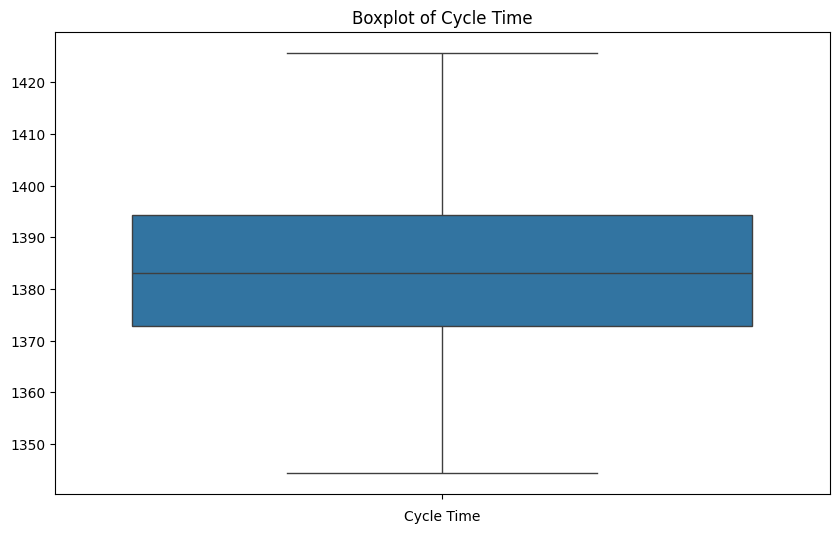

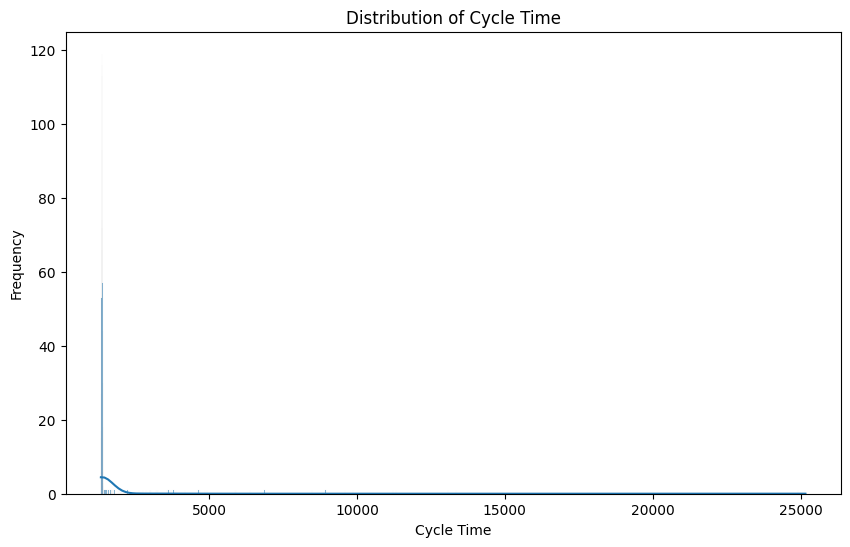

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

cycle_time_values = [float(row['Cycle Time']) for row in data.values()]

cycle_time_df = pd.DataFrame({'Cycle Time': cycle_time_values})
cycle_time_descriptive_stats = cycle_time_df.describe()

q1 = np.percentile(cycle_time_values, 25)
q3 = np.percentile(cycle_time_values, 75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = [value for value in cycle_time_values if value < lower_bound or value > upper_bound]
num_outliers = len(outliers)

print("Descriptive Analysis of Cycle Time:")
print(cycle_time_descriptive_stats)
print(f"Number of Outliers: {num_outliers}")
plt.figure(figsize=(10, 6))
sns.boxplot(y=cycle_time_values, showfliers=False)
plt.title('Boxplot of Cycle Time')
plt.xlabel('Cycle Time')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(cycle_time_values, kde=True)
plt.title('Distribution of Cycle Time')
plt.xlabel('Cycle Time')
plt.ylabel('Frequency')
plt.show()

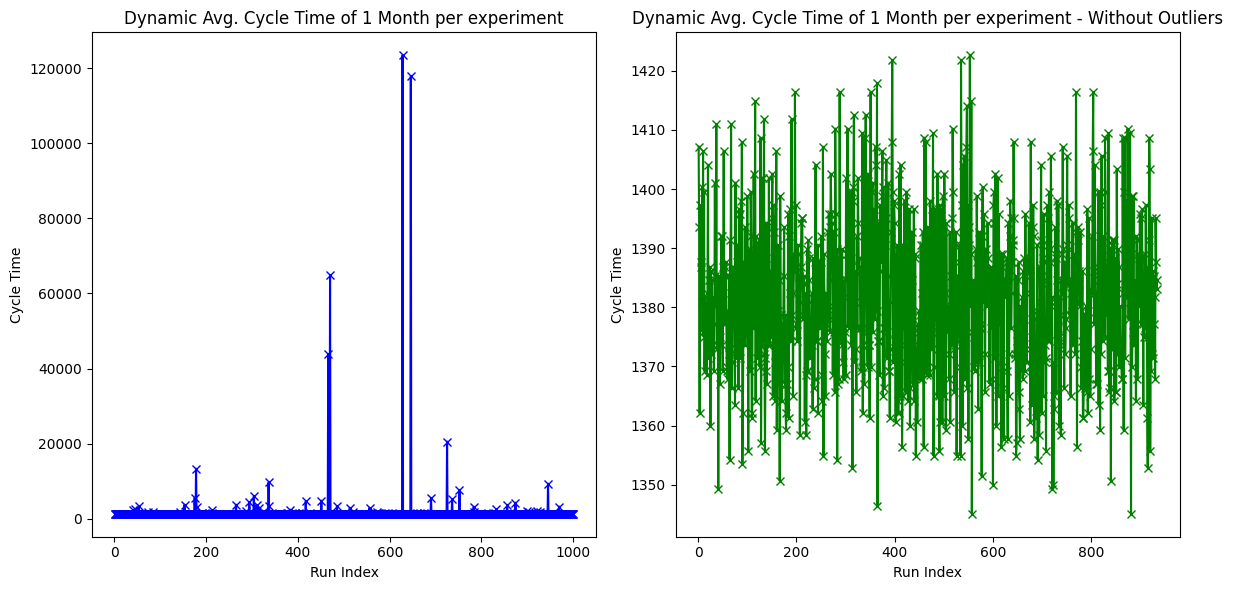

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out outliers
filtered_cycle_time_values = [value for value in cycle_time_values if value >= lower_bound and value <= upper_bound]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(cycle_time_values) + 1), cycle_time_values, marker='x', linestyle='-', color='b')
plt.title('Dynamic Avg. Cycle Time of 1 Month per experiment')
plt.xlabel('Run Index')
plt.ylabel('Cycle Time')

# Create a run order plot without outliers
plt.subplot(1, 2, 2)
plt.plot(range(1, len(filtered_cycle_time_values) + 1), filtered_cycle_time_values, marker='x', linestyle='-', color='g')
plt.title('Dynamic Avg. Cycle Time of 1 Month per experiment - Without Outliers')
plt.xlabel('Run Index')
plt.ylabel('Cycle Time')

plt.tight_layout()
plt.show()


In [55]:
from scipy.stats import ttest_1samp
expected_mean = 1000

t_statistic, p_value = ttest_1samp(cycle_time_values, expected_mean)

print(f'T-Statistic: {t_statistic}')
print(f'P-Value: {p_value}')

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. Results are statistically significant.")
else:
    print("Fail to reject the null hypothesis. Results are not statistically significant.")

T-Statistic: 4.530775717708676
P-Value: 6.586530652271476e-06
Reject the null hypothesis. Results are statistically significant.


One function

In [30]:
def get_data(csv_file_path):
 
    data = {}
    with open(csv_file_path, newline='') as csvfile:
        csv_reader = csv.DictReader(csvfile)

        for row in csv_reader:
            row['Mean Idle Times'] = ast.literal_eval(row['Mean Idle Times'])
            row['Sum Idle Times'] = ast.literal_eval(row['Sum Idle Times'])
            row['Downtime'] = ast.literal_eval(row['Downtime'])
            row['Mean CT'] = ast.literal_eval(row['Mean CT'])

            data[row['Experiment']] = row

    return data

In [31]:
def analyze_it(csv_file_path):
    
    data = get_data(csv_file_path)

    
    machine_mean_idle_times = {}

    for experiment, row in data.items():
        for machine_num, idle_time in enumerate(row['Mean Idle Times'], start=1):
            if machine_num not in machine_mean_idle_times:
                machine_mean_idle_times[machine_num] = []
            machine_mean_idle_times[machine_num].append(idle_time)

    num_machines = len(machine_mean_idle_times)
    num_rows = (num_machines // 2) + (num_machines % 2)  

    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 8), sharex=True, sharey=True)
    fig.suptitle('Distribution of Mean Idle Time for Each Machine', y=1.02)

    axes = axes.flatten()

    for machine_num, ax in zip(sorted(machine_mean_idle_times.keys()), axes):
        mean_idle_times = machine_mean_idle_times[machine_num]
        ax.hist(mean_idle_times, bins=20, label=f'Machine {machine_num}', alpha=0.7)
        ax.set_title(f'Machine {machine_num}')
        ax.set_xlabel('Mean Idle Time')
        ax.set_ylabel('Frequency')
        ax.legend()

    if num_machines % 2 == 1:
        fig.delaxes(axes[-1])

    plt.tight_layout()
    plt.show()

    mean_ct_values_per_machine = {}

    for experiment, row in data.items():
        for machine_num, _ in enumerate(row['Mean CT'], start=1): 
            machine_mean_ct_values = []
            
            for row in data.values():
                machine_mean_ct_values.append(row['Mean CT'][machine_num - 1])
            
            mean_ct_values_per_machine[f'Machine {machine_num}'] = machine_mean_ct_values
    
    descriptive_df = pd.DataFrame()

    for machine, values in mean_ct_values_per_machine.items():
        descriptive_df[machine] = values

    descriptive_stats = descriptive_df.describe().transpose()

    print("Descriptive Analysis of Mean CT per Machine:")
    print(descriptive_stats)
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.boxplot(mean_ct_values_per_machine.values(), vert=True, labels=mean_ct_values_per_machine.keys(), sym='.', showfliers=False)
    ax.set_title('Boxplot of Mean CT per Machine')
    ax.set_xlabel('Mean CT')
    ax.set_ylabel('Machine')
    plt.show()

    cycle_time_values = [float(row['Cycle Time']) for row in data.values()]

    cycle_time_df = pd.DataFrame({'Cycle Time': cycle_time_values})
    cycle_time_descriptive_stats = cycle_time_df.describe()

    q1 = np.percentile(cycle_time_values, 25)
    q3 = np.percentile(cycle_time_values, 75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = [value for value in cycle_time_values if value < lower_bound or value > upper_bound]
    num_outliers = len(outliers)

    print("Descriptive Analysis of Cycle Time:")
    print(cycle_time_descriptive_stats)
    print(f"Number of Outliers: {num_outliers}")
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=cycle_time_values, showfliers=False)
    plt.title('Boxplot of Cycle Time')
    plt.xlabel('Cycle Time')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.histplot(cycle_time_values, kde=True)
    plt.title('Distribution of Cycle Time')
    plt.xlabel('Cycle Time')
    plt.ylabel('Frequency')
    plt.show()

    filtered_cycle_time_values = [value for value in cycle_time_values if value >= lower_bound and value <= upper_bound]

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(cycle_time_values) + 1), cycle_time_values, marker='o', linestyle='-', color='b')
    plt.title('Dynamic Avg. Cycle Time of 1 Month per experiment')
    plt.xlabel('Run Index')
    plt.ylabel('Cycle Time')

    # Create a run order plot without outliers
    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(filtered_cycle_time_values) + 1), filtered_cycle_time_values, marker='o', linestyle='-', color='g')
    plt.title('Dynamic Avg. Cycle Time of 1 Month per experiment - Without Outliers')
    plt.xlabel('Run Index')
    plt.ylabel('Cycle Time')

    plt.tight_layout()
    plt.show()
    

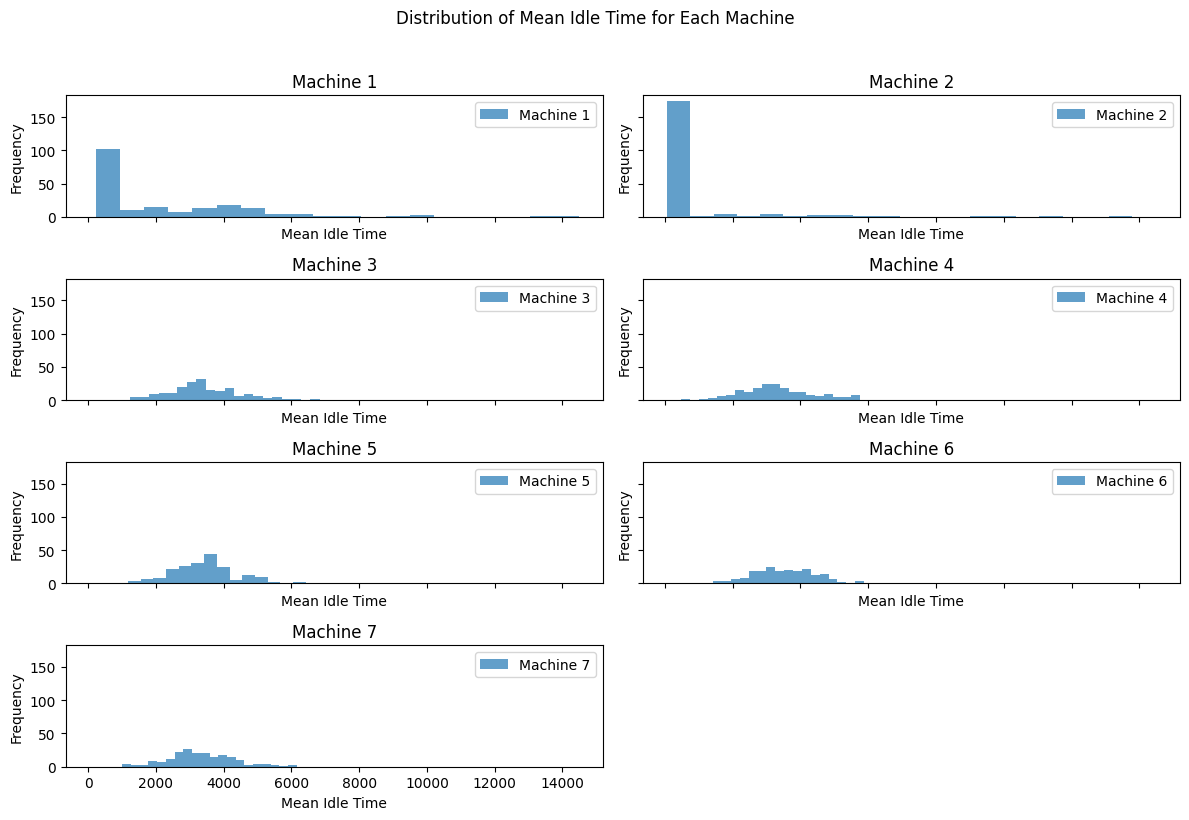

Descriptive Analysis of Mean CT per Machine:
           count          mean          std           min           25%  \
Machine 1  200.0   9970.299812  4125.384873   9564.575646   9564.575646   
Machine 2  200.0  15020.289836  5844.966250  14320.441989  14400.000000   
Machine 3  200.0    958.087528   457.014561    887.367340    908.437767   
Machine 4  200.0    973.887371   470.257530    902.506964    923.981842   
Machine 5  200.0    990.739211   478.317864    921.763869    939.811458   
Machine 6  200.0   1007.461146   485.116992    940.152339    955.047900   
Machine 7  200.0   1028.174628   493.534939    958.934517    975.169300   

                    50%           75%           max  
Machine 1   9564.575646   9564.575646  64800.000000  
Machine 2  14400.000000  14480.446927  92571.428571  
Machine 3    914.931168    920.536291   7101.369863  
Machine 4    929.365364    935.064935   7301.408451  
Machine 5    944.606414    951.541850   7426.934097  
Machine 6    960.000000    968

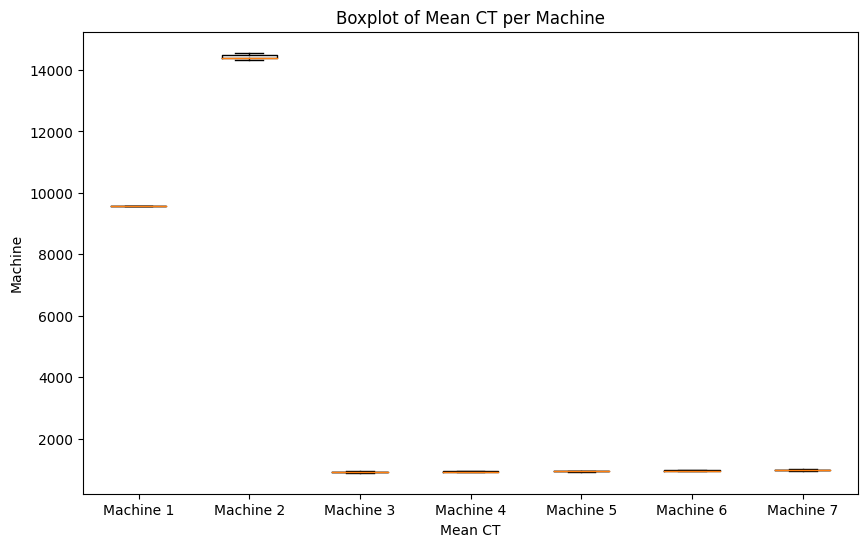

Descriptive Analysis of Cycle Time:
        Cycle Time
count   200.000000
mean   1040.724452
std     497.843151
min     970.423063
25%     987.428571
50%     993.103448
75%    1000.385951
max    7737.313433
Number of Outliers: 5


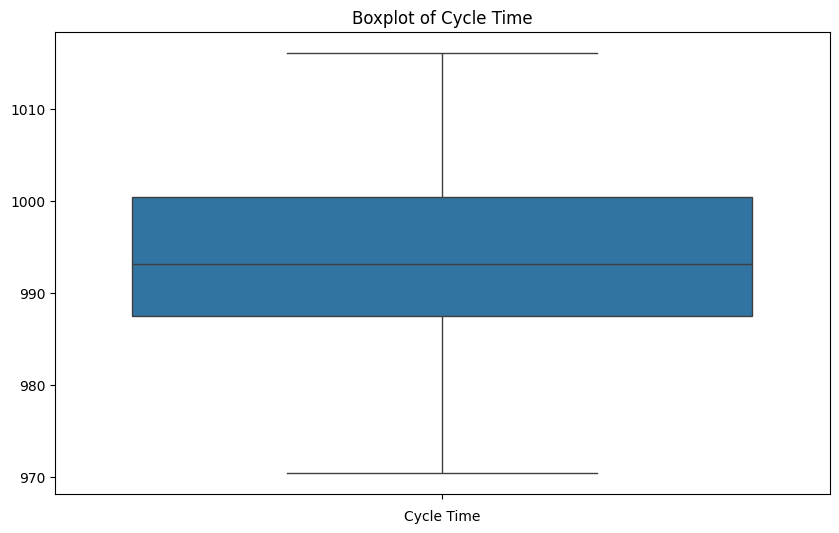

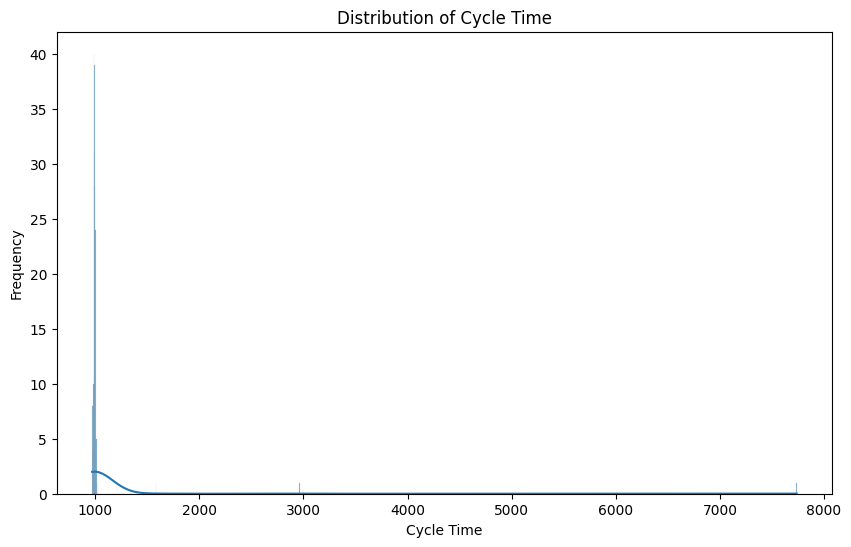

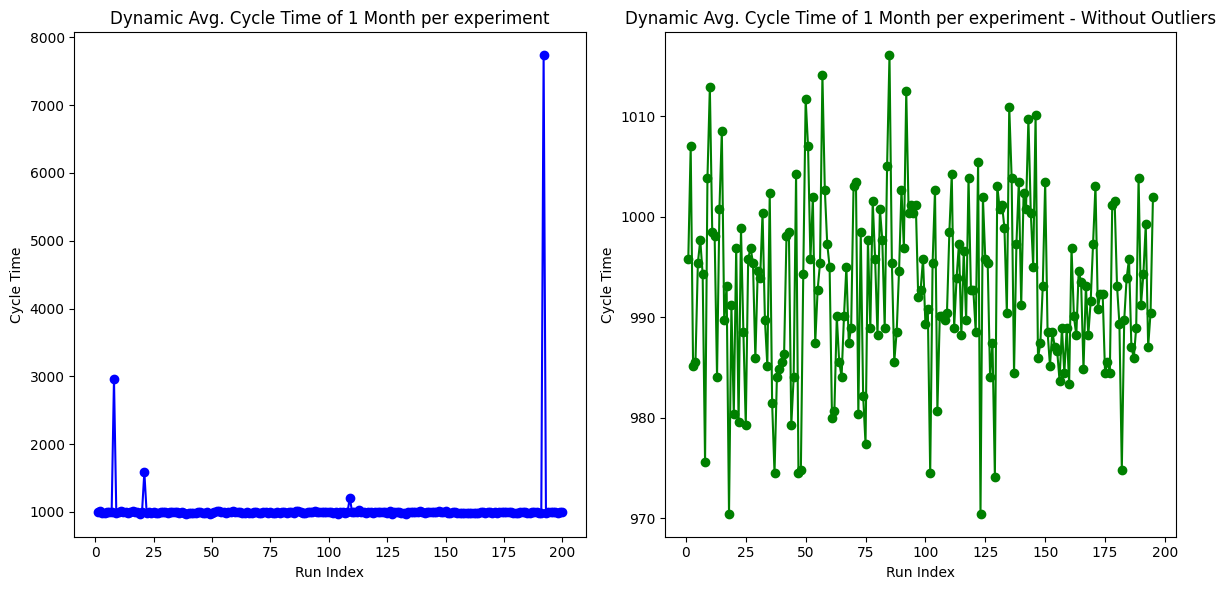

In [46]:
import csv
import ast
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


analyze_it('results/results_2.csv')


Analysis of effect of Buffer size

In [109]:
csv_file_path = 'results/results.csv'

df = pd.read_csv(csv_file_path)

In [114]:
CT_per_experiment = df["Sum Idle Times"].apply(eval)

In [115]:
CT_per_experiment[0]

[82522.0, 68151.0, 0.0, 85140.0, 77310.0, 80830.0, 81720.0]

In [123]:
meanCT_per_experiment = []
buffer_sizes= []
for i in range(len(CT_per_experiment)):
    meanCT_per_experiment.append(np.sum(CT_per_experiment[i]))
    buffer_sizes.append(i*10+1)

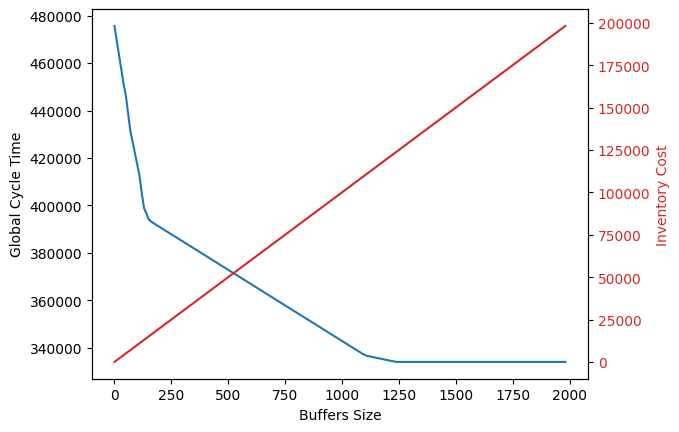

In [139]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Buffers Size")
ax1.set_ylabel('Total Waiting Time')
ax1.plot(buffer_sizes, meanCT_per_experiment)
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Inventory Cost', color=color)  # we already handled the x-label with ax1
ax2.plot(buffer_sizes, [100*i for i in buffer_sizes], color=color)
ax2.tick_params(axis='y', labelcolor=color)

In [ ]:
import numpy as np

def function_to_optimize(buffer_capacities):
    """
    Define the function that you want to optimize.
    """
    # Example function: sum of squares
    return np.sum(buffer_capacities**2)

def finite_perturbation_analysis(function, buffer_capacities, perturbation_value=1):
    """
    Perform Finite Perturbation Analysis to estimate the gradient of the function with respect to buffer capacities.
    """
    gradient_estimate = np.zeros_like(buffer_capacities)

    for i in range(len(buffer_capacities)):

        buffer_capacities_plus = buffer_capacities.copy()
        buffer_capacities_plus[i] += perturbation_value
        buffer_capacities_minus = buffer_capacities.copy()
        buffer_capacities_minus[i] -= perturbation_value

        function_plus = function(buffer_capacities_plus)
        function_minus = function(buffer_capacities_minus)

        gradient_estimate[i] = (function_plus - function_minus) / (2 * perturbation_value)

    return gradient_estimate

# Example usage:
initial_buffer_capacities = np.array([1.0, 2.0, 3.0])
gradient_estimate = finite_perturbation_analysis(function_to_optimize, initial_buffer_capacities)
print("Gradient Estimate:", gradient_estimate)
